# Exercice 3 : Stochastic Gradient Learning in Neural Networks 

We consider the observation $z = (x,y)$ and the cost or expected risk given a parameter $w$ with respect to the probability $\mathbb{P}$ : 

$$ R(w) = \mathbb{E}[J(w,z)] = \int ( y - w^T x)^2 d \mathbb{P}(z) $$

While we don't have complete information about $\mathbb{P}$, we will consider the empirical risk function estimated based on the $n\in\mathbb{N}$ drawn samples $\{ z_i = (x_i,y_i)\}_{i=1}^n $

$$R_n(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - w^T x_i )^2 $$ 

We define $J(z,w) = (y - w^T x )^2$ the loss for one sample.

### 1. Stochastic gradient descent algorithm : 

The goal of the gradient descent algorithm is to minimize the empirical cost over $w$. In the stochastic gradient descent algorithm, we minimize $R_n(w)$ by deriving over one sample choosen randomly for each iteration. 

Which give the following update rule for $w$ : 
    $$ w_{t+1} \leftarrow w_t - \epsilon_t \nabla_w J(z,w_t) $$
with 
    $$ J(z,w_t) = (y_i - w^T x_i )^2 $$
and 
    $$ \nabla_w J(z,w_t)  =  - (y_i - w^T x_i ) x_i $$

The update rule for $\epsilon$ is : 
    $$ \epsilon_t = \frac{1}{t^\alpha} $$ for $t \geq 1$ 
with $\alpha \in [0.5,1]$

## 2. Implementation :

In [1]:
# Import the libraries : 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 

In [2]:
N = 50 # Number of samples 
# Generate 200 random points in two dimensions : 
X = np.random.uniform(0,1,[N,2])
# Generate the normal vector w of the line that separate the points : 
w_true = np.array([1,-2])
# Define the labels of the points : 
y_true = np.sign(np.matmul(X,w_true))
y_true_bool = (y_true > 0 )

In [3]:
def plotline(w,is_true=False): 
    # Function to plot the vectorial line of normal w 
    plt.ylim((0,1))
    plt.xlim((0,1))
    if is_true : 
        s = 'y--'
    else:
        s = 'b-'
    if w[0] == 0 : 
        plt.plot(np.array([0,0]),np.array([0,1]) , s)
        return;
    elif w[1] == 0 : 
        plt.plot(np.array([0,1]),np.array([0,0]) , s)
        return;
    else :       
        x = 1; 
        y = -(w[0]*x) / w[1];
        plt.plot(np.array([0,x]),np.array([0,y]) , s)
        return; 

In [4]:
def GS(X,y,T,alpha): 
    # Implementation of the stochastic gradient to find the optimal w after T iteration : 
    ## Step 1 : initialization
    alpha = 0.5
    w = np.random.uniform(-1,1,size = 2)
    N = X.shape[0]
    ## Step 2 : Stochastic Gradient iteration
    eps = 1 
    for k in range(T) : 
        i = np.random.randint(N)
        w = w  +  eps * (y[i] - np.matmul(X[i],w) ) * X[i]
        eps = 1.0 / (k+1)**alpha 
    return w / w[0] # Output new w with w[0] = 1 

In [5]:
w_gs = GS(X,y_true,10,0.5)
w_gs

array([ 1.        , -1.54499072])

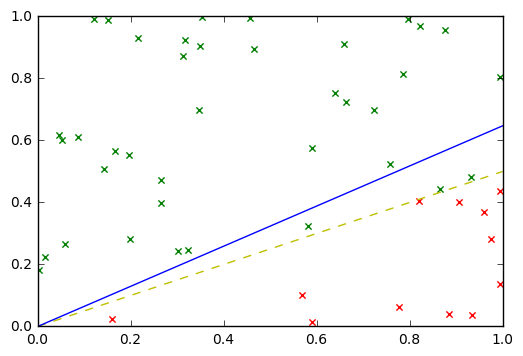

In [6]:
# Plot the points with the line 
plotline(w_true,is_true = True)
plotline(w_gs,is_true =False)
plt.scatter(X[y_true_bool,0],X[y_true_bool,1],c='r',marker='x')
plt.scatter(X[~y_true_bool,0],X[~y_true_bool,1],c='g',marker='x')